<a href="https://colab.research.google.com/github/udyansachdev1/Cloud_us26_week1/blob/main/us26_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install datasets

In [3]:
# Importing the Required Pacakges and Libraries

import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from datasets import load_dataset
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

# Warnings
import warnings
warnings.filterwarnings("ignore")

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-03-07 02:16:32.097220: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 02:16:32.141932: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 02:16:32.141969: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 02:16:32.143050: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin

In [4]:
# loading the Dataset
data_df = load_dataset("cifar10")
data_df

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})

Text(0.5, 1.0, '0')

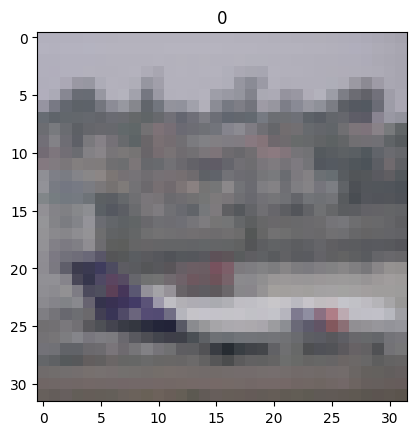

In [5]:
iteration = next(iter(data_df['train']))
plt.imshow(iteration['img'])
plt.title(iteration['label'])

### Preprocessing the Data

Creating the Training Data

In [6]:
# Data Preprocessing
x_train = np.array([np.array(i)[None, ...] / 255.0 for i in data_df["train"]["img"][:]])

#Flattening 
x_train = x_train.reshape(x_train.shape[0], -1)

# Creating Labels for y_train
y_train = np.array(data_df["train"]["label"][:])

Creating the Test Data

In [7]:
# Data Preprocessing
x_test = np.array([np.array(i)[None, ...] / 255.0 for i in data_df["test"]["img"][:]])

#Flattening
x_test = x_test.reshape(x_test.shape[0], -1)

# Creating Labels for y_test
y_test = np.array(data_df["test"]["label"][:])

## Assessing Model Performance 

### Implementing Random Forest without ResNet50


In [8]:
# Creating the model
model_with_rf = RandomForestClassifier(n_estimators=200)

# Fit the model
model_with_rf.fit(x_train, y_train)

# Predictions
model_pred = model_with_rf.predict(x_test)

# Accuracy Score 
accuracy = accuracy_score(y_test, model_pred)
print(f"Accuracy with 200 estimators: {accuracy:.2%}")

#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, model_pred)
print(f"Confusion Matrix with 200 estimators: \n{confusion_matrix}")

Accuracy with 200 estimators: 48.13%
Confusion Matrix with 200 estimators: 
[[564  28  56  21  30  18  25  23 168  67]
 [ 27 563  16  25  18  28  39  32  62 190]
 [104  44 334  80 140  59 133  55  27  24]
 [ 55  38  72 272  72 190 146  57  17  81]
 [ 53  19 142  49 398  53 153  86  23  24]
 [ 34  31  81 149  74 411  82  83  24  31]
 [  7  33  83  64  95  51 596  24   9  38]
 [ 40  38  43  55  96  91  51 469  22  95]
 [ 83  83  13  22  22  31  14  20 631  81]
 [ 43 171  13  26  15  20  25  37  75 575]]


### Logistic Regression model without ResNet50

In [9]:
# Importing necessary libraries
from sklearn.metrics import confusion_matrix

# Creating the Logistic Regression Model
model_log = LogisticRegression(max_iter=200, multi_class="auto", solver="lbfgs", random_state=42)

# Fitting the Model
model_log.fit(x_train, y_train)

# Model Predictions
model_log_pred = model_log.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, model_log_pred)
print(f"Accuracy: {accuracy:.2%}")

# Confusion matrix
cm = confusion_matrix(y_test, model_log_pred)
print(f"Confusion Matrix: \n{cm}")


Accuracy: 40.77%
Confusion Matrix: 
[[486  46  60  26  29  34  25  49 172  73]
 [ 56 472  30  35  27  31  35  52  85 177]
 [ 96  44 286  92 123  77 139  79  43  21]
 [ 40  62  98 260  60 192 141  52  37  58]
 [ 57  20 130  80 306  82 162 105  29  29]
 [ 37  49  96 163  90 328  89  69  47  32]
 [ 17  36  68 130  96  79 493  45  14  22]
 [ 43  50  72  70  82  83  44 446  37  73]
 [171  70  24  30   9  42  14  20 523  97]
 [ 70 172  26  22  18  26  51  48  90 477]]


## Generating embeddings using ResNet50

In [4]:
# Generating the Model
model_rn= tf.keras.applications.resnet50.ResNet50(
  include_top=False, 
  weights='imagenet', 
  pooling='avg' 
)

# Image Preprossing Function
def preprocessing(img):
    img= preprocess_input(
        tf.image.resize(
            np.array(img), (224, 224)
        )[None]  
    )
    return img

# Generating embeddings with ResNet50
X_train_rn = np.array([model_rn.predict(preprocessing(i)) for i in data_df["train"]["img"][:]])
X_train_rn = X_train_rn.reshape(X_train_rn.shape[0], -1)

X_test_rn = np.array([model_rn.predict(preprocessing(i)) for i in data_df["test"]["img"][:]])
X_test_rn = X_test_rn.reshape(X_test_rn.shape[0], -1)


NameError: name 'tf' is not defined

In [3]:
#Plotting the X_train_rn
import matplotlib.pyplot as plt
plt.plot(X_train_rn[0].flatten())

NameError: name 'X_train_rn' is not defined

### Random Forest model with ResNet50 embeddings




In [ ]:
# Creating the Model
model_rf_rn = RandomForestClassifier(n_estimators=200)

# Fit the Model
model_rf_rn.fit(X_train_rn, y_train)

# Predicting the Test Data
model_pred = model_rf_rn.predict(X_test_rn)

# Accuracy
accuracy = accuracy_score(y_test, model_pred)
print(f"Accuracy with 200 estimators: {accuracy:.2%}")

#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, model_pred)
print(f"Confusion Matrix with 200 estimators: \n{confusion_matrix}")

Accuracy with 200 estimators: 86.79%
Confusion Matrix with 200 estimators: 
[[896   7  12   4   5   2   3   5  49  17]
 [  4 928   0   3   0   0   1   2   8  54]
 [ 40   3 803  32  52  17  36   9   6   2]
 [  5   2  29 761  31  98  46  14   3  11]
 [  7   1  31  26 848   6  31  45   3   2]
 [  2   0  15 102  22 824   9  24   1   1]
 [  7   0  22  33  10   7 921   0   0   0]
 [  9   3  13  28  47  28   3 862   5   2]
 [ 34  11   3   7   0   0   1   0 929  15]
 [ 17  58   1   2   1   1   0   0  13 907]]


### Logistic Regression model with ResNet50 embeddings


In [ ]:
# Creating the Logistic Regression Model
model_log_rn = LogisticRegression(max_iter=300, multi_class="auto", solver="lbfgs", random_state=42)

# Fitting the Model
model_log_rn.fit(X_train_rn, y_train)

# Predicting on Test Data
model_pred = model_log_rn.predict(X_test_rn)

# Model Evaluation
accuracy = accuracy_score(y_test, model_pred)
print(f"Accuracy: {accuracy:.2%}")

#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, model_pred)
print(f"Confusion Matrix: \n{confusion_matrix}")

Accuracy: 90.11%
Confusion Matrix: 
[[926   3  12   4   4   3   1   4  33  10]
 [ 10 945   0   1   0   1   1   3   7  32]
 [ 15   0 877  23  35  11  23   9   5   2]
 [  2   0  19 814  24  91  26  15   4   5]
 [  3   0  23  28 888  12  14  26   4   2]
 [  1   0  10  94  15 853   8  18   1   0]
 [  3   0  24  29   4   4 932   3   1   0]
 [  6   0   9  15  38  23   0 909   0   0]
 [ 35   6   4   2   2   0   1   0 943   7]
 [  9  44   1   3   1   0   1   4  13 924]]


> Using ResNet50 to embed the data took longer than the regular embedding process. Nevertheless, both models exhibited enhancements in accuracy and confusion matrix performance compared to those without ResNet50.

In [ ]:
# @title Lab work
# Loop over the remaining CIFAR10 dataset to produce 2048 embeddings of the image
# Use a logistic regression or random foreset to try and classify these features as before
# Try to use batching to speed up the generation of your features, what is batching?
# Steps:
# 1. Your input data is a 32x32x3 image. You have 50,000 images total so your input dimension is
#    50000 x (32 x 32 x 3). Or 50000 rows and 3072 (which is (32 x 32 x 3)) pixels.
#    Previously we use pixels as features of or Logistic Regression and Random Forest
# 2. The ResNet50 model transforms our pixels into "2048" feature embedding so now it is
#    50000 rows and 2048 columns of "features"
# 3. Use these new features to train a simple logistic regression and random forest model as we did in the scikit learn example
#    https://colab.research.google.com/drive/1KUperg8lvb3gYBPzP6sbZd89Ft8rDbYG#scrollTo=_bAd38A0N73w